In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:18230"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device=torch.device("cpu")
print(f"Using device: {device}")
path="/its/home/drs25/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
datapath="/its/home/drs25/Documents/data/Tactile Dataset/datasets/"
if os.name == 'nt':
    path="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
    datapath="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/texture-tactip/"

colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
    'white', 'gray', 'orange', 'purple', 'brown', 'pink', 'lime', 
    'indigo', 'gold', 'teal', 'navy', 'maroon', 'olive', 'coral'
]
labels=['Cotton', 'Felt', 'Leather', 'FoamG', 'Flat', 'FoamE', 'Plastic', 'Cork', 'Carpet', 'LongCarpet', 'FoamF', 'Bubble', 'LacedMatt', 'Jeans', 'Wool']

/its/home/drs25/miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Using device: cuda


## load data set

In [2]:
data = np.load(datapath+"X_data_presstip.npz") #load data
X=None
for array_name in data:
    X=data[array_name]
X=(X* 3.3) / 65536 #convert to voltage
data = np.load(datapath+"y_data_presstip.npz") #load data
y=None
for array_name in data:
    y=data[array_name]
print(X.shape,y.shape)


(3000, 20, 16) (3000,)


## Piezoelectric


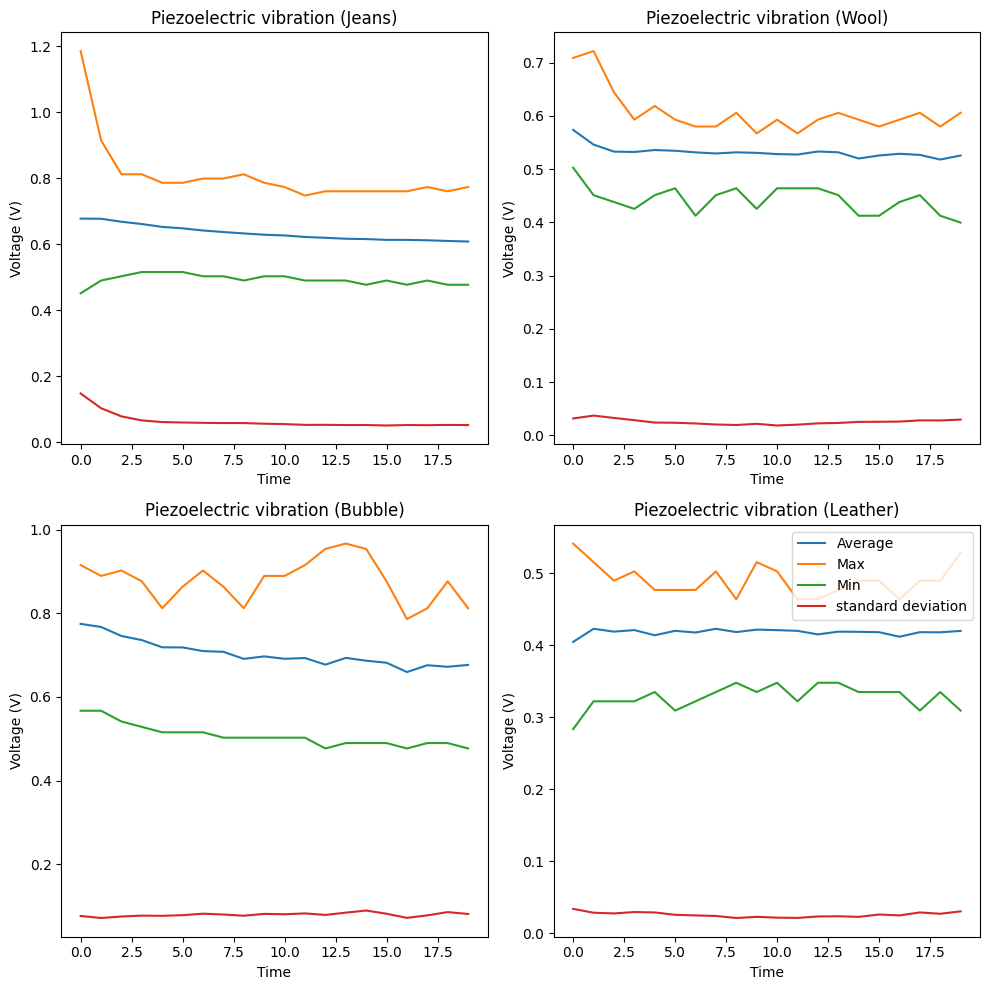

In [48]:
Leather=X[np.where(y==1)]
Felt=X[np.where(y==2)]
cotton=X[np.where(y==0)]
jeans=X[np.where(y==13)]
wool=X[np.where(y==14)]
bubble=X[np.where(y==11)]

std=np.std(jeans,axis=0)
av=np.average(jeans,axis=0)
ma=np.max(jeans,axis=0)
mi=np.min(jeans,axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].plot(av[:,8])
axes[0].plot(ma[:,8])
axes[0].plot(mi[:,8])
axes[0].plot(std[:,8])
axes[0].set_ylabel("Voltage (V)")
axes[0].set_xlabel("Time")
axes[0].set_title("Piezoelectric vibration (Jeans)")

std=np.std(wool,axis=0)
av=np.average(wool,axis=0)
ma=np.max(wool,axis=0)
mi=np.min(wool,axis=0)

axes[1].plot(av[:,8],label="Average")
axes[1].plot(ma[:,8],label="Max")
axes[1].plot(mi[:,8],label="Min")
axes[1].plot(std[:,8],label="standard deviation")
axes[1].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time")
axes[1].set_title("Piezoelectric vibration (Wool)")


std=np.std(bubble,axis=0)
av=np.average(bubble,axis=0)
ma=np.max(bubble,axis=0)
mi=np.min(bubble,axis=0)

axes[2].plot(av[:,8],label="Average")
axes[2].plot(ma[:,8],label="Max")
axes[2].plot(mi[:,8],label="Min")
axes[2].plot(std[:,8],label="standard deviation")
axes[2].set_ylabel("Voltage (V)")
axes[2].set_xlabel("Time")
axes[2].set_title("Piezoelectric vibration (Bubble)")


std=np.std(Leather,axis=0)
av=np.average(Leather,axis=0)
ma=np.max(Leather,axis=0)
mi=np.min(Leather,axis=0)

axes[3].plot(av[:,8],label="Average")
axes[3].plot(ma[:,8],label="Max")
axes[3].plot(mi[:,8],label="Min")
axes[3].plot(std[:,8],label="standard deviation")
axes[3].set_ylabel("Voltage (V)")
axes[3].set_xlabel("Time")
axes[3].set_title("Piezoelectric vibration (Leather)")
axes[3].legend(loc="upper right")

plt.tight_layout()
plt.savefig(path+"/images/piezoExample.pdf")
plt.show()



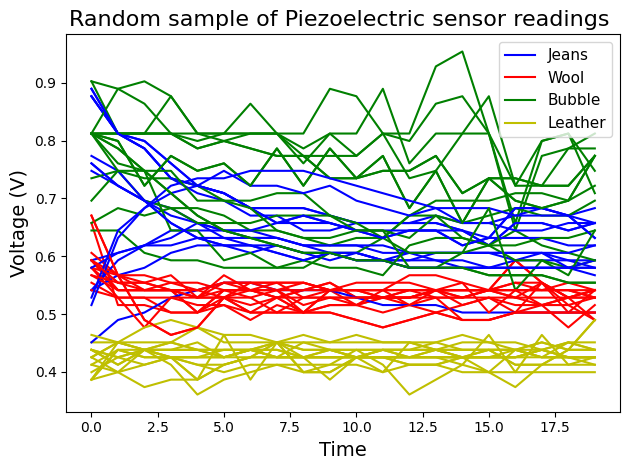

In [24]:
ind=np.random.random((15,))*100
ind=ind.astype(np.uint8)
for i in range(len(ind)):
    plt.plot(jeans[ind[i]][:,8],c="b")
    plt.plot(wool[ind[i]][:,8],c="r")
    plt.plot(bubble[ind[i]][:,8],c="g")
    plt.plot(Leather[ind[i]][:,8],c="y")

plt.plot(jeans[ind[i]][:,8],c="b",label="Jeans")
plt.plot(wool[ind[i]][:,8],c="r",label="Wool")
plt.plot(bubble[ind[i]][:,8],c="g",label="Bubble")
plt.plot(Leather[ind[i]][:,8],c="y",label="Leather")
plt.legend(loc="upper right",fontsize=11)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Voltage (V)",fontsize=14)
plt.title("Random sample of Piezoelectric sensor readings ",fontsize=16)
plt.tight_layout()
plt.savefig(path+"/images/randomSamplePiezo.pdf")
plt.show()

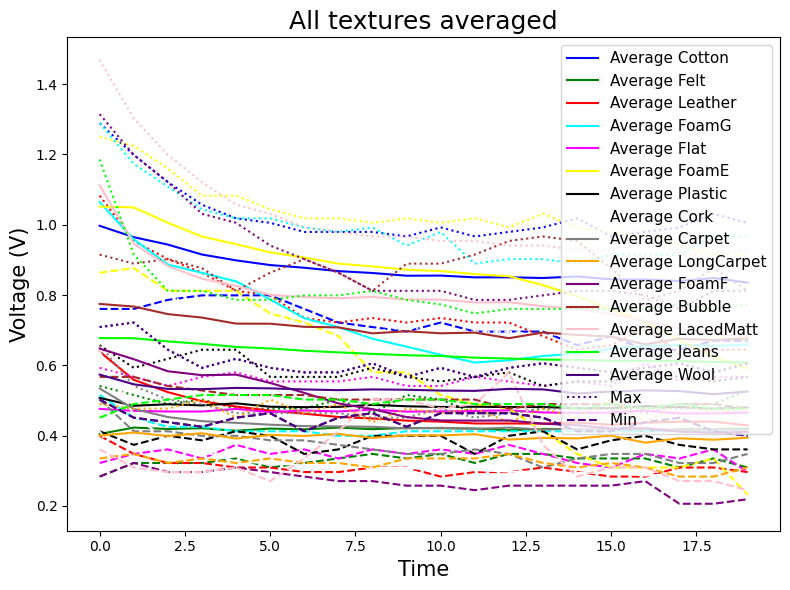

In [67]:
#plot arages of all
num_textures=15

plt.figure(figsize=(8, 6))

for i in range(num_textures):
    texture=X[np.where(y==i)]
    name=labels[i]
    av=np.average(texture,axis=0)
    ma=np.max(texture,axis=0)
    mi=np.min(texture,axis=0)
    plt.plot(av[:,8],c=colors[i],label="Average "+name)
    plt.plot(ma[:,8],linestyle="dotted",c=colors[i])
    plt.plot(mi[:,8],linestyle="dashed",c=colors[i])

plt.plot(ma[:,8],linestyle="dotted",c=colors[i],label="Max ")
plt.plot(mi[:,8],linestyle="dashed",c=colors[i],label="Min ")
plt.legend(loc="upper right",fontsize=11)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Voltage (V)",fontsize=15)
plt.title("All textures averaged",fontsize=18)#
plt.tight_layout()
plt.savefig(path+"/images/allAveragedElectric.pdf")
plt.show()

### SVM

In [49]:
X_r=X[:,0:10,8]
print(X_r.shape)

train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
svm_model = SVC(decision_function_shape='ovo')

svm_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = svm_model.predict(test_X)
y_pred2 = svm_model.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

np.save(path+"/data/SVM_P_x.npy",y_pred)
np.save(path+"/data/SVM_P_y.npy",test_y)

(3000, 10)
Test Accuracy: 0.7033333333333334
Train Accuracy: 0.7041666666666667


#### T experiment


In [28]:
t_test=[]
t_train=[]

for i in range(1,20):
    X_r=X[:,0:i,8]
    train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
    svm_model = SVC(decision_function_shape='ovo')
    svm_model.fit(train_X, train_y)
    y_pred = svm_model.predict(test_X)
    y_pred2 = svm_model.predict(train_X)
    loss=np.abs(y_pred-test_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_test.append(correct/len(loss))
    loss=np.abs(y_pred2-train_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_train.append(correct/len(loss))

np.save(path+"data/svm_presstip_p_train",np.array(t_train))
np.save(path+"data/svm_presstip_p_test",np.array(t_test))


### RFC

In [50]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
y_pred2 = clf.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

np.save(path+"/data/RFC_P_x.npy",y_pred)
np.save(path+"/data/RFC_P_y.npy",test_y)

Test Accuracy: 0.7616666666666667
Train Accuracy: 0.9995833333333334


#### T experiment

In [29]:
t_test=[]
t_train=[]

for i in range(1,20):
    X_r=X[:,0:i,8]
    train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    y_pred2 = clf.predict(train_X)
    loss=np.abs(y_pred-test_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_test.append(correct/len(loss))
    loss=np.abs(y_pred2-train_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_train.append(correct/len(loss))

np.save(path+"data/svm_RFC_p_train",np.array(t_train))
np.save(path+"data/svm_RFC_p_test",np.array(t_test))


## Accelerometer

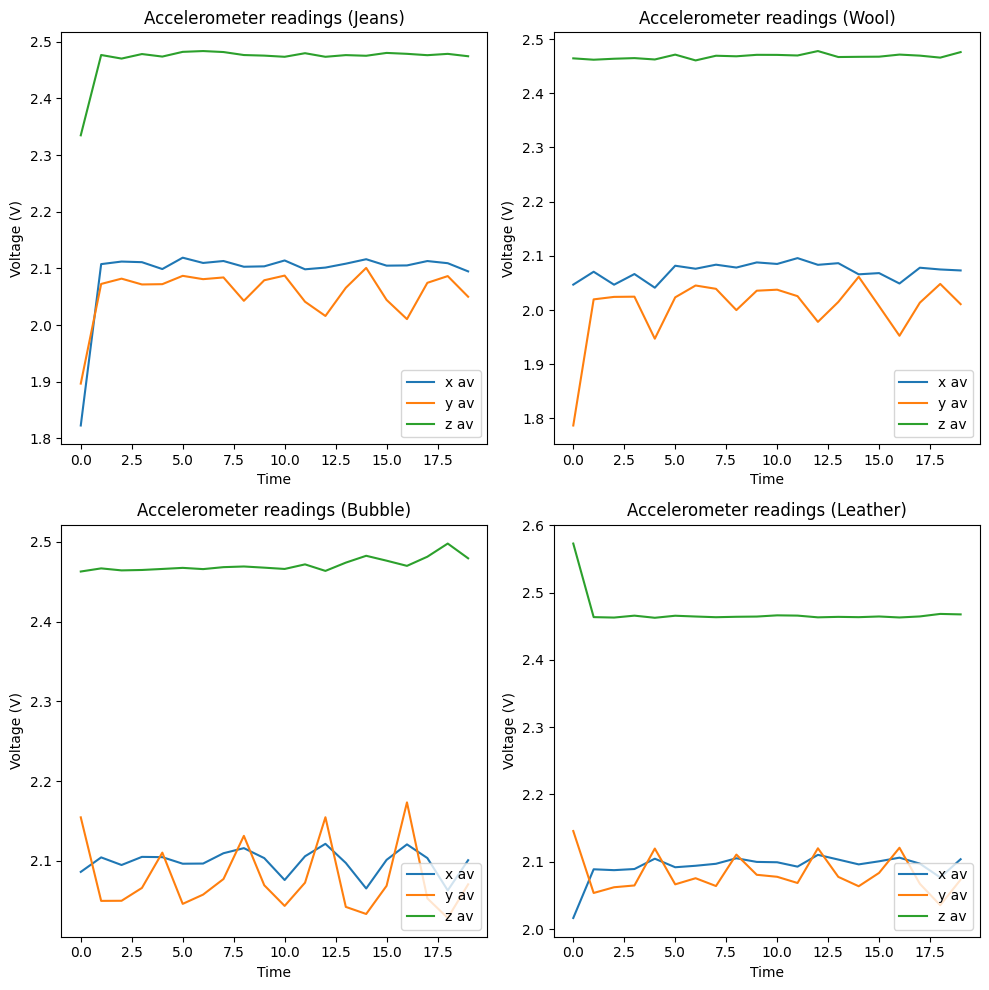

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.flatten()

av=np.average(jeans,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[0].plot(av[:,9:12],label=["x av","y av","z av"])
axes[0].set_ylabel("Voltage (V)")
axes[0].set_xlabel("Time")
axes[0].set_title("Accelerometer readings (Jeans)")
axes[0].legend(loc="lower right")

av=np.average(wool,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[1].plot(av[:,9:12],label=["x av","y av","z av"])
axes[1].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time")
axes[1].set_title("Accelerometer readings (Wool)")
axes[1].legend(loc="lower right")

av=np.average(bubble,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[2].plot(av[:,9:12],label=["x av","y av","z av"])
axes[2].set_ylabel("Voltage (V)")
axes[2].set_xlabel("Time")
axes[2].set_title("Accelerometer readings (Bubble)")
axes[2].legend(loc="lower right")

av=np.average(Leather,axis=0)
x_av=av[:,9]
y_av=av[:,10]
z_av=av[:,11]

axes[3].plot(av[:,9:12],label=["x av","y av","z av"])
axes[3].set_ylabel("Voltage (V)")
axes[3].set_xlabel("Time")
axes[3].set_title("Accelerometer readings (Leather)")
axes[3].legend(loc="lower right")

plt.tight_layout()
plt.savefig(path+"/images/accExample.pdf")
plt.show()

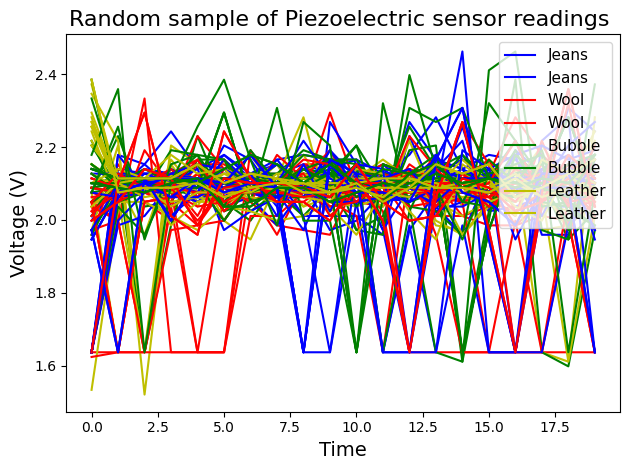

In [66]:
ind=np.random.random((15,))*100
ind=ind.astype(np.uint8)
for i in range(len(ind)):
    plt.plot(jeans[ind[i]][:,9:11],c="b")
    plt.plot(wool[ind[i]][:,9:11],c="r")
    plt.plot(bubble[ind[i]][:,9:11],c="g")
    plt.plot(Leather[ind[i]][:,9:11],c="y")

plt.plot(jeans[ind[i]][:,9:11],c="b",label="Jeans")
plt.plot(wool[ind[i]][:,9:11],c="r",label="Wool")
plt.plot(bubble[ind[i]][:,9:11],c="g",label="Bubble")
plt.plot(Leather[ind[i]][:,9:11],c="y",label="Leather")
plt.legend(loc="upper right",fontsize=11)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Voltage (V)",fontsize=14)
plt.title("Random sample of Piezoelectric sensor readings ",fontsize=16)
plt.tight_layout()
plt.savefig(path+"/images/randomSampleAcc.pdf")
plt.show()

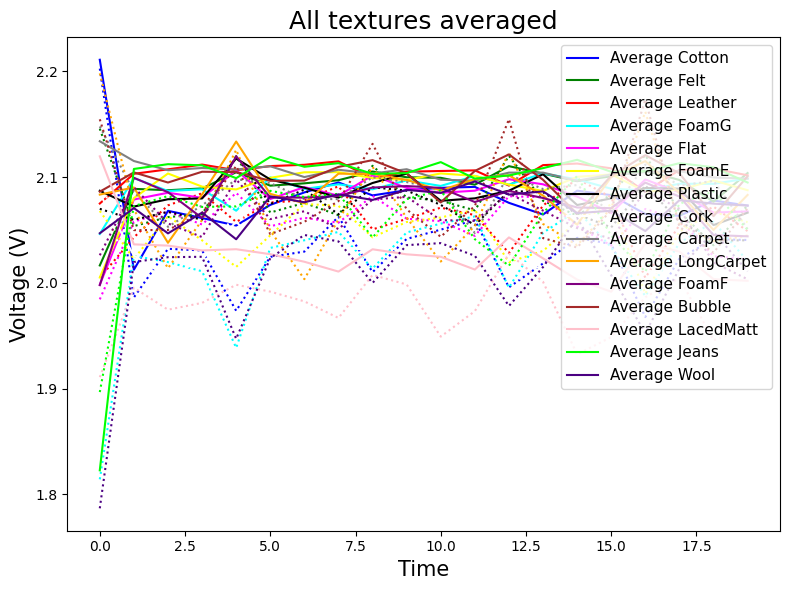

In [70]:
#plot arages of all
num_textures=15

plt.figure(figsize=(8, 6))

for i in range(num_textures):
    texture=X[np.where(y==i)]
    name=labels[i]
    av=np.average(texture,axis=0)
    plt.plot(av[:,9],c=colors[i],label="Average "+name)
    plt.plot(av[:,10],linestyle="dotted",c=colors[i])


plt.legend(loc="upper right",fontsize=11)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Voltage (V)",fontsize=15)
plt.title("All textures averaged",fontsize=18)#
plt.tight_layout()
plt.savefig(path+"/images/allAveragedAcc.pdf")
plt.show()

### SVM

In [75]:
X_r=X[:,0:10,9:12].reshape(len(X),10*3)
print(X_r.shape)
encoder = OneHotEncoder()  # sparse_output=False returns a dense array
# Fit and transform the label data
onehot_labels = encoder.fit_transform(y.reshape(-1, 1))
print(onehot_labels[0])

train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
svm_model = SVC(decision_function_shape='ovo')

svm_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = svm_model.predict(test_X)
y_pred2 = svm_model.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

np.save(path+"/data/SVM_a_x.npy",y_pred)
np.save(path+"/data/SVM_a_y.npy",test_y)

(3000, 30)
  (0, 12)	1.0
Test Accuracy: 0.45666666666666667
Train Accuracy: 0.51875


#### T experiment

In [40]:
t_test=[]
t_train=[]

for i in range(1,20):
    X_r=X[:,0:i,9:12].reshape(len(X),i*3)
    train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
    svm_model = SVC(decision_function_shape='ovo')
    svm_model.fit(train_X, train_y)
    y_pred = svm_model.predict(test_X)
    y_pred2 = svm_model.predict(train_X)
    loss=np.abs(y_pred-test_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_test.append(correct/len(loss))
    loss=np.abs(y_pred2-train_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_train.append(correct/len(loss))

np.save(path+"data/svm_presstip_a_train",np.array(t_train))
np.save(path+"data/svm_presstip_a_test",np.array(t_test))


### RFC

In [77]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
y_pred2 = clf.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

np.save(path+"/data/RFC_a_x.npy",y_pred)
np.save(path+"/data/RFC_a_y.npy",test_y)

Test Accuracy: 0.615
Train Accuracy: 1.0


#### T experiment

In [ ]:
t_test=[]
t_train=[]

for i in range(1,20):
    X_r=X[:,0:i,9:12].reshape(len(X),i*3)
    train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    y_pred2 = clf.predict(train_X)
    loss=np.abs(y_pred-test_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_test.append(correct/len(loss))
    loss=np.abs(y_pred2-train_y)
    loss[loss>0]=1
    correct=len(loss)-np.sum(loss)
    t_train.append(correct/len(loss))

np.save(path+"data/RFC_a_train",np.array(t_train))
np.save(path+"data/RFC_a_test",np.array(t_test))


# Together

### SVM

In [11]:
X_r=X[:,0:10,8:12].reshape(len(X),10*4)
print(X_r.shape)
encoder = OneHotEncoder()  # sparse_output=False returns a dense array
# Fit and transform the label data
onehot_labels = encoder.fit_transform(y.reshape(-1, 1))
print(onehot_labels[0])

train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
svm_model = SVC(decision_function_shape='ovo')

svm_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = svm_model.predict(test_X)
y_pred2 = svm_model.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

(3000, 40)
  (0, 12)	1.0
Test Accuracy: 0.5316666666666666
Train Accuracy: 0.5891666666666666


In [12]:
X_r=X[:,0:10].reshape(len(X),10*16)
print(X_r.shape)
encoder = OneHotEncoder()  # sparse_output=False returns a dense array
# Fit and transform the label data
onehot_labels = encoder.fit_transform(y.reshape(-1, 1))
print(onehot_labels[0])

train_X, test_X, train_y, test_y = train_test_split(X_r, y, test_size=0.2, random_state=42)
svm_model = SVC(decision_function_shape='ovo')

svm_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = svm_model.predict(test_X)
y_pred2 = svm_model.predict(train_X)

loss=np.abs(y_pred-test_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Test Accuracy:",correct/len(loss))

loss=np.abs(y_pred2-train_y)
loss[loss>0]=1
correct=len(loss)-np.sum(loss)
print("Train Accuracy:",correct/len(loss))

(3000, 160)
  (0, 12)	1.0
Test Accuracy: 0.35833333333333334
Train Accuracy: 0.37083333333333335


# Neural models

In [91]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
class SimpleANN(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(SimpleANN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_num, hidden_num)  # Input to hidden layer
        self.relu = nn.ReLU()                        # Activation function
        self.fc2 = nn.Linear(hidden_num, output_num) # Hidden to output layer

    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
def get_acc(model,X,y):
    preds=model(X)
    preds=torch.argmax(preds,axis=1)
    a=torch.abs(preds-torch.argmax(y,axis=1))
    return (len(a[a==0])/len(a)) *100


def run(model,num_epochs,train_x,labels):
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.005)
    clip_value = 5
    history=[]
    acc=[0]
    for epoch in range(num_epochs):
            running_loss=0
        #for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            # Forward pass
            outputs = model(train_x)
            #print(inputs.shape,outputs.shape,labels.shape)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            if epoch%200==0:
                clear_output()
                print("Epoch ",str(epoch+1)+":",running_loss,"Accuracy:",acc[-1],"%")
            history.append(running_loss)
            acc.append(get_acc(model,train_X,labels))
    return history,acc


### LSTM train

In [83]:

X_r=X[:,0:20,8:12].reshape(len(X),20,4)
print(X_r.shape)
X_r=torch.tensor(X_r, dtype=torch.float32).to(device)
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y)
one_hot_labels = torch.nn.functional.one_hot(torch.tensor(train_labels_encoded), num_classes=len(np.unique(train_labels_encoded)))
y_r = torch.tensor(one_hot_labels, dtype=torch.float32).to(device)
train_X, test_X, train_y, test_y = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
print(train_X.shape,train_y.shape)
lstm=SimpleLSTM(len(train_X[0][0]),50,15).to(device)
hist,acc=run(lstm,1000,train_X,train_y)

(3000, 20, 4)
torch.Size([2400, 20, 4]) torch.Size([2400, 15])
Epoch: 2.711854934692383 Accuracy: 0 %


/tmp/ipykernel_23490/793569454.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_r = torch.tensor(one_hot_labels, dtype=torch.float32).to(device)


Epoch: 2.708709955215454 Accuracy: 6.375 %
Epoch: 2.7070963382720947 Accuracy: 6.916666666666667 %
Epoch: 2.7060933113098145 Accuracy: 6.916666666666667 %
Epoch: 2.7053279876708984 Accuracy: 7.000000000000001 %


### ANN train

In [109]:

X_r=X[:,0:10,9:12].reshape(len(X),10*3)
print(X_r.shape)
X_r=torch.tensor(X_r, dtype=torch.float32).to(device)
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y)
one_hot_labels = torch.nn.functional.one_hot(torch.tensor(train_labels_encoded), num_classes=len(np.unique(train_labels_encoded)))
y_r = torch.tensor(one_hot_labels, dtype=torch.float32).to(device)
train_X, test_X, train_y, test_y = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
#train_X=torch.concatenate([train_X,train_X+torch.normal(0,0.2,train_X.shape).to(device)]).to(device)
#train_y=torch.concatenate([train_y,train_y]).to(device)
print(train_X.shape,train_y.shape)
model=SimpleANN(len(train_X[0]),50,15).to(device)
hist3,acc3=run(model,100000,train_X,train_y)

Epoch  99801: 1.7482190132141113 Accuracy: 48.291666666666664 %


In [112]:
print("Test accuracy:",get_acc(model,test_X,test_y))
print("Train accuracy:",get_acc(model,train_X,train_y))


Test accuracy: 46.0
Train accuracy: 48.291666666666664


In [110]:
np.save(path+"/data/historyANN_acc",hist3)
np.save(path+"/data/accuracyANN_acc",acc3)

#### Grid search

In [118]:
train_a=np.zeros((20,20,3))
test_a=np.zeros((20,20,3))

for i in range(1,20):
    for j in range(i+1,20):
        for k in range(3):
            X_r=X[:,i:j,8:12].reshape(len(X),(j-i)*4)
            X_r=torch.tensor(X_r, dtype=torch.float32).to(device)
            label_encoder = LabelEncoder()
            train_labels_encoded = label_encoder.fit_transform(y)
            one_hot_labels = torch.nn.functional.one_hot(torch.tensor(train_labels_encoded), num_classes=len(np.unique(train_labels_encoded)))
            y_r = torch.tensor(one_hot_labels, dtype=torch.float32).to(device)
            train_X, test_X, train_y, test_y = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
            #train_X=torch.concatenate([train_X,train_X+torch.normal(0,0.2,train_X.shape).to(device)]).to(device)
            #train_y=torch.concatenate([train_y,train_y]).to(device)
            print(train_X.shape,train_y.shape)
            model=SimpleANN(len(train_X[0]),50,15).to(device)
            hist,acc=run(model,10000,train_X,train_y)
            train_a[i][j][k]=get_acc(model,train_X,train_y)
            test_a[i][j][k]=get_acc(model,test_X,test_y)
np.save(path+"/data/train_grid_electric",train_a)
np.save(path+"/data/test_grid_electric",test_a)


Epoch  9801: 2.4145686626434326 Accuracy: 20.625 %


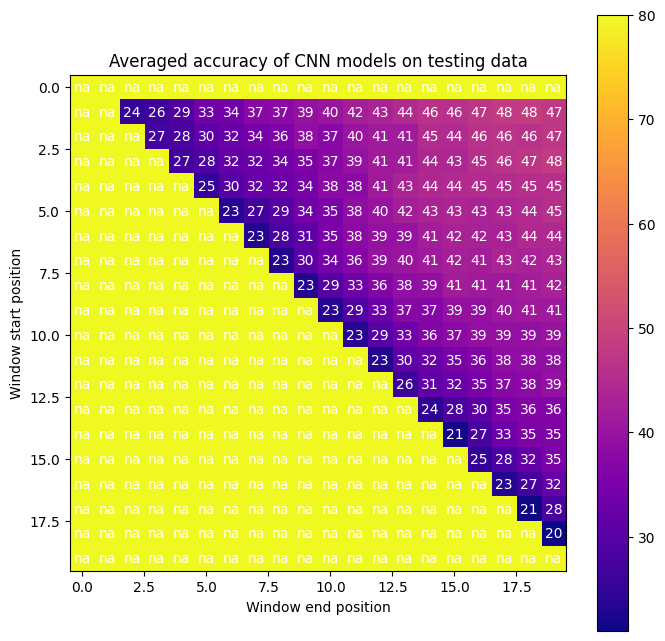

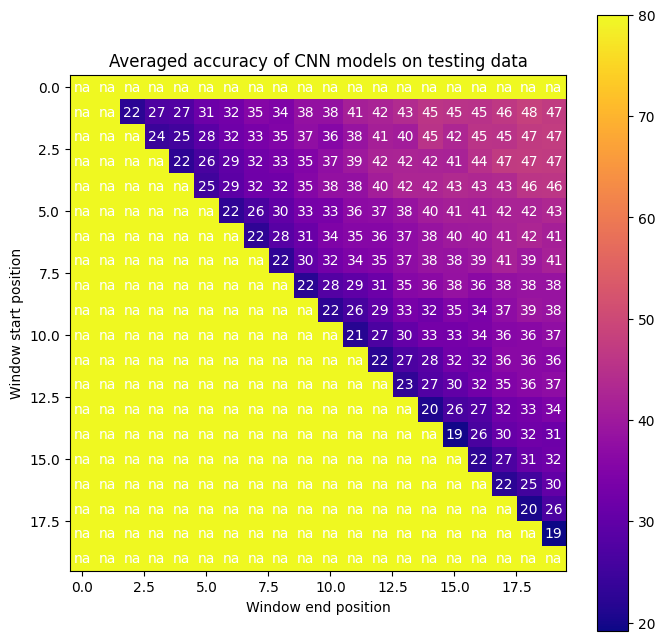

In [129]:
plt.figure(figsize=(8,8))
train=np.load(path+"/data/train_grid_electric.npy")
test=np.max(train,axis=2)
"""test=(test-np.min(test))/(np.max(test)-np.min(test))
test*=255"""
test[test==0]=80
plt.imshow(test,cmap="plasma")
# Loop over data dimensions and create text annotations.
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        num=int(test[i,j])
        if num==80: num="na"
        plt.text(j, i, num, ha='center', va='center', color='white')

plt.title("Averaged accuracy of CNN models on testing data")
plt.xlabel("Window end position")
plt.ylabel("Window start position")
plt.colorbar()
plt.tight_layout()
plt.savefig(path+"/images/allframes_train.pdf")
plt.show()

plt.figure(figsize=(8,8))
test=np.load(path+"/data/test_grid_electric.npy")
test=np.max(test,axis=2)
"""test=(test-np.min(test))/(np.max(test)-np.min(test))
test*=255"""
test[test==0]=80
plt.imshow(test,cmap="plasma")
# Loop over data dimensions and create text annotations.
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        num=int(test[i, j])
        if num==80: num="na"
        plt.text(j, i, num, ha='center', va='center', color='white')

plt.title("Averaged accuracy of CNN models on testing data")
plt.xlabel("Window end position")
plt.ylabel("Window start position")
plt.colorbar()
plt.tight_layout()
plt.savefig(path+"/images/allframes_test.pdf")
plt.show()

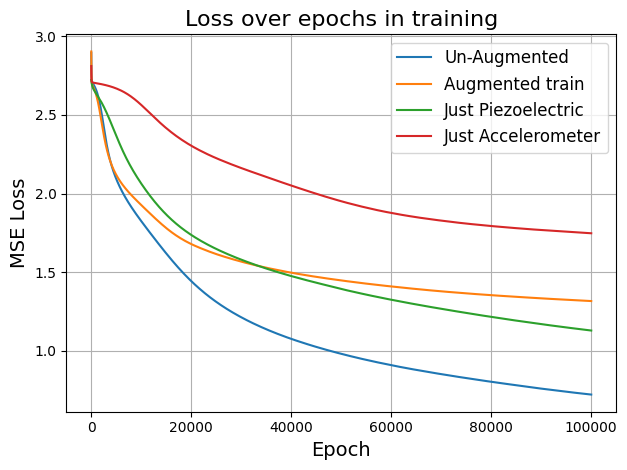

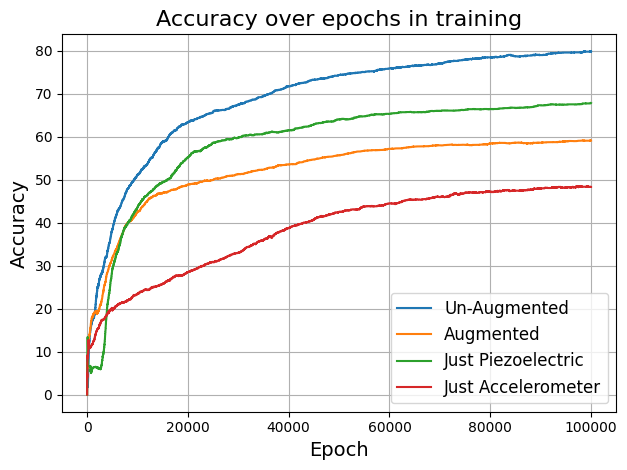

In [115]:
hist=np.load(path+"/data/historyANN_all.npy")
acc=np.load(path+"/data/accuracyANN_all.npy")
hist1=np.load(path+"/data/historyANN_all_augmented.npy")
acc1=np.load(path+"/data/accuracyANN_all_augmented.npy")
hist2=np.load(path+"/data/historyANN.npy")
acc2=np.load(path+"/data/accuracyANN.npy")
hist3=np.load(path+"/data/historyANN_acc.npy")
acc3=np.load(path+"/data/accuracyANN_acc.npy")

plt.plot(hist,label="Un-Augmented")
plt.plot(hist1,label="Augmented train")
plt.plot(hist2,label="Just Piezoelectric")
plt.plot(hist3,label="Just Accelerometer")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("MSE Loss",fontsize=14)
plt.grid(True)
plt.title("Loss over epochs in training",fontsize=16)
plt.legend(loc="upper right",fontsize=12)
plt.tight_layout()
plt.savefig(path+"images/losslectricalANN.pdf")
plt.show()

plt.plot(acc,label="Un-Augmented")
plt.plot(acc1,label="Augmented")
plt.plot(acc2,label="Just Piezoelectric")
plt.plot(acc3,label="Just Accelerometer")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.grid(True)
plt.title("Accuracy over epochs in training",fontsize=16)
plt.legend(loc="lower right",fontsize=12)
plt.tight_layout()
plt.savefig(path+"images/AcclectricalANN.pdf")
plt.show()

# plot sensor

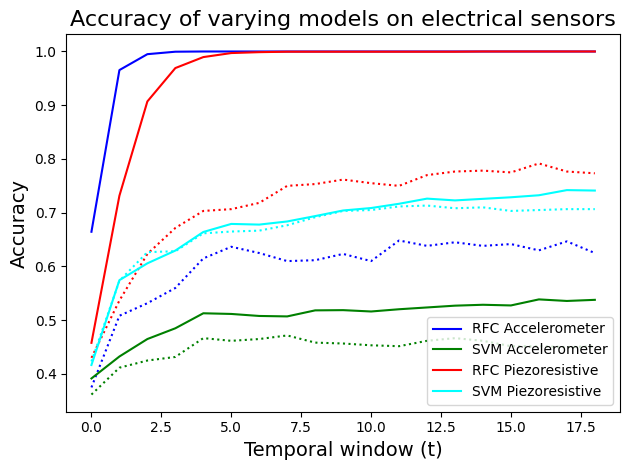

In [47]:
RFC_acc_train=np.load(path+"data/RFC_a_train.npy")
RFC_acc_test=np.load(path+"data/RFC_a_test.npy")

SVM_acc_train=np.load(path+"data/svm_presstip_a_train.npy")
SVM_acc_test=np.load(path+"data/svm_presstip_a_test.npy")

RFC_acc_trainP=np.load(path+"data/svm_RFC_p_train.npy")
RFC_acc_testP=np.load(path+"data/svm_RFC_p_test.npy")

SVM_acc_trainP=np.load(path+"data/svm_presstip_p_train.npy")
SVM_acc_testP=np.load(path+"data/svm_presstip_p_test.npy")

plt.plot(RFC_acc_train,c=colors[0],label="RFC Accelerometer")
plt.plot(RFC_acc_test,c=colors[0],linestyle="dotted")

plt.plot(SVM_acc_train,c=colors[1],label="SVM Accelerometer")
plt.plot(SVM_acc_test,c=colors[1],linestyle="dotted")

plt.plot(RFC_acc_trainP,c=colors[2],label="RFC Piezoresistive")
plt.plot(RFC_acc_testP,c=colors[2],linestyle="dotted")

plt.plot(SVM_acc_trainP,c=colors[3],label="SVM Piezoresistive")
plt.plot(SVM_acc_testP,c=colors[3],linestyle="dotted")

plt.legend(loc="lower right")
plt.title("Accuracy of varying models on electrical sensors",fontsize=16)
plt.xlabel("Temporal window (t)",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.tight_layout()
plt.savefig(path+"/images/accuracyOfPressTIp.pdf")
plt.show()

## Pressure

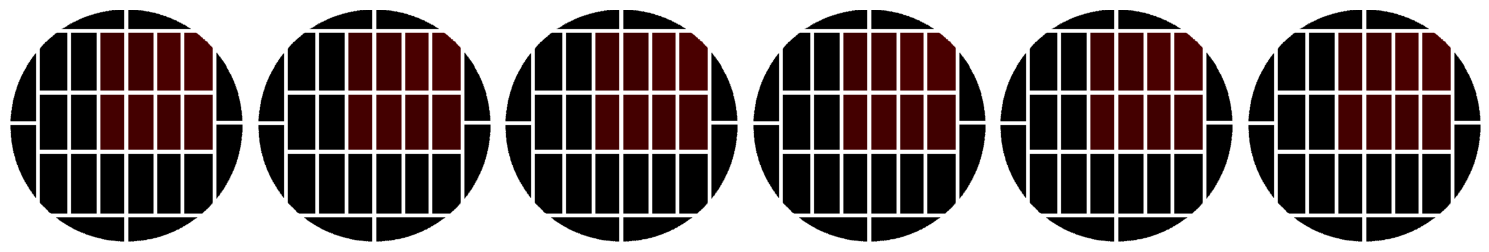

In [79]:
def visualise_pressues(channels):
    img = cv2.imread('/its/home/drs25/Pictures/pressTip/demonstrate.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dictionary={0:(0,189,230),1:(230,211,0),2:(230,0,227),3:(30,108,12),4:(230,0,0),6:(0,20,101),5:(121,36,116),6:(0,20,101),7:(229,112,112),8:(-1,-1,-1),9:(-1,-1,-1),10:(-1,-1,-1),11:(-1,-1,-1),12:(121,78,36),13:(0,45,230),14:(230,83,0),15:(112,229,122)}
    copied=np.zeros_like(img)
    mask = np.all(img == (0,0,0), axis=-1)
    copied[mask]=(255,255,255)
    for i in range(0,len(channels)):
        assert dictionary[i] in img or dictionary[i] == (-1,-1,-1), "Colour not in image:"+str(dictionary[i]) #check that the colour is in the correct format
        mask = np.all(img == dictionary[i], axis=-1)
        copied[mask]=(min(255,int(channels[i]*255)),0,0)
        #print((min(255,int(channels[i]*255)),0,0))
    mask = np.any((copied<110) & (copied>0), axis=-1)
    copied[mask,0]+=60
    copied[copied>255]=255
    copied[copied<0]=0

    return copied

av=np.average(X,axis=0)
fig, axes = plt.subplots(1, 6, figsize=(15, 10))
axes = axes.flatten()
for i in range(6):
    im=axes[i].imshow(visualise_pressues(av[i]),cmap="cividis")
    axes[i].axis("off")
plt.tight_layout()

## Plot confusion matrix

['Cotton']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


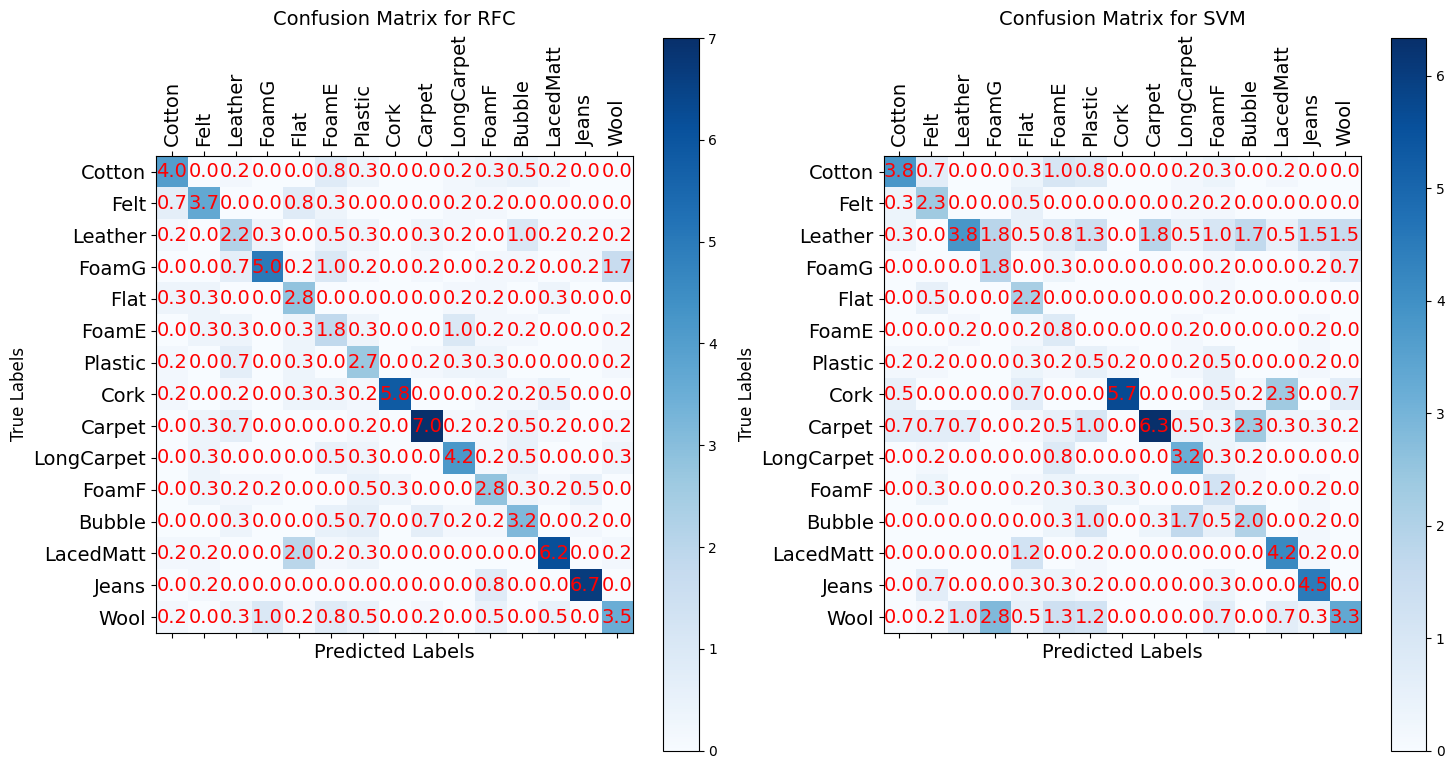

In [78]:
def compute_confusion_matrix(true_labels, pred_labels, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    un=np.unique(test_y)
    for t, p in zip(true_labels, pred_labels):
        matrix[t, p] += 1
    matrix=matrix.astype(np.float64)
    matrix/=len(true_labels)
    return matrix


SVM_lab=np.load(path+"/data/SVM_a_y.npy")
SVM_pred=np.load(path+"/data/SVM_a_x.npy")
RF_lab=np.load(path+"/data/RFC_a_y.npy")
RF_pred=np.load(path+"/data/RFC_a_x.npy")

predictions = [np.round(RF_pred).astype(np.uint8),SVM_pred]
labels_=[RF_lab,SVM_lab]
model_names = ["RFC",'SVM']
num_classes = len(np.unique(SVM_lab))
print(np.unique(labels[0]))
print(np.unique(predictions[0]))
indices = np.arange(num_classes)
# Plotting confusion matrices for each model
fig, axes = plt.subplots(1, len(predictions), figsize=(15,8))


for i, preds in enumerate(predictions):
    num_classes = len(np.unique(labels_[i]))
    un=np.unique(labels_[i])
    cm = compute_confusion_matrix(predictions[i], labels_[i], num_classes=num_classes)
    ax = axes[i] if len(predictions) > 1 else axes
    cax = ax.matshow(cm*100, cmap='Blues')
    fig.colorbar(cax, ax=ax)
    
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, f'{round(value*100,1)}', ha='center', va='center', color='red',fontsize=14)
    
    ax.set_title(f'Confusion Matrix for {model_names[i]}',fontsize=14)
    ax.set_xlabel('Predicted Labels',fontsize=14)
    ax.set_xticks(indices)
    ax.set_xticklabels([labels[j] for j in range(num_classes)],rotation=90,fontsize=14)
    ax.set_ylabel('True Labels',fontsize=12)
    ax.set_yticks(indices)
    ax.set_yticklabels([labels[j] for j in range(num_classes)],rotation=0,fontsize=14)

plt.tight_layout()
plt.savefig(path+"/images/SVM_RFC_Presstip_a.pdf")
plt.show()